In [1]:
# Import dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd
import seaborn as sns
import plotly.express as px
from pandas.plotting import scatter_matrix




/opt/anaconda3/envs/dev/lib/python3.10/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


In [2]:
# Import the data from the CSV file
mls_df = pd.read_csv("Clean_Data/mls_th_cleaned.csv")
mls_df.head()

,Mortgage Rates,MLS #,City,Zip,Bedrooms,Total Baths,SqFt,Acres,Year Built,List Date,Closing Date,List Price,Sold Price,Days on Market,Over Asking,Lat,Lon,Cluster,Price per SqFt
0,2.65,2326790,Durham,27707,3,4,2339,1,2020,2020-06-24,2021-01-08,301980,319129,198,17149,35.9631,-78.9315,1,136.438221
1,2.65,2356953,Wake Forest,27587,3,3,1570,1,2002,2020-12-08,2021-01-06,199000,215000,29,16000,35.9815,-78.5392,4,136.942675
2,2.65,2352181,Cary,27511,3,3,1464,1,1992,2020-11-05,2021-01-05,249900,264774,61,14874,35.7641,-78.7786,1,180.856557
3,2.65,2323642,Raleigh,27603,3,4,1732,1,2020,2020-06-07,2021-01-08,283645,296550,215,12905,35.7076,-78.6563,4,171.218245
4,2.65,2352460,Durham,27713,3,4,2337,1,1985,2020-11-06,2021-01-08,229900,242500,63,12600,35.9112,-78.9178,1,103.765511


In [3]:
# Copy the data frame to a new data frame
th_df = mls_df.copy()

th_df.head()

,Mortgage Rates,MLS #,City,Zip,Bedrooms,Total Baths,SqFt,Acres,Year Built,List Date,Closing Date,List Price,Sold Price,Days on Market,Over Asking,Lat,Lon,Cluster,Price per SqFt
0,2.65,2326790,Durham,27707,3,4,2339,1,2020,2020-06-24,2021-01-08,301980,319129,198,17149,35.9631,-78.9315,1,136.438221
1,2.65,2356953,Wake Forest,27587,3,3,1570,1,2002,2020-12-08,2021-01-06,199000,215000,29,16000,35.9815,-78.5392,4,136.942675
2,2.65,2352181,Cary,27511,3,3,1464,1,1992,2020-11-05,2021-01-05,249900,264774,61,14874,35.7641,-78.7786,1,180.856557
3,2.65,2323642,Raleigh,27603,3,4,1732,1,2020,2020-06-07,2021-01-08,283645,296550,215,12905,35.7076,-78.6563,4,171.218245
4,2.65,2352460,Durham,27713,3,4,2337,1,1985,2020-11-06,2021-01-08,229900,242500,63,12600,35.9112,-78.9178,1,103.765511


In [4]:
th_df.describe()

,Mortgage Rates,Zip,Bedrooms,Total Baths,SqFt,Acres,Year Built,List Price,Sold Price,Days on Market,Over Asking,Lat,Lon,Cluster,Price per SqFt
count,21170.000000,21170.000000,21170.000000,21170.000000,21170.000000,21170.000000,21170.000000,2.117000e+04,2.117000e+04,21170.000000,21170.000000,21170.000000,21170.000000,21170.000000,21170.000000
mean,5.167953,27580.721493,2.924138,3.105338,1798.321398,1.014832,2010.414265,3.552470e+05,3.597792e+05,94.037459,4532.138829,35.837608,-78.764410,1.866131,201.158032
std,1.739171,116.885026,0.611515,0.603543,462.756918,0.183053,13.526034,1.203503e+05,1.197214e+05,91.474410,17808.482233,0.141479,0.225046,1.289621,42.571844
min,2.650000,25727.000000,1.000000,1.000000,606.000000,1.000000,1936.000000,2.200000e+03,2.200000e+03,0.000000,-170000.000000,34.265100,-82.277400,0.000000,1.304864
25%,3.090000,27519.000000,3.000000,3.000000,1463.000000,1.000000,2004.000000,2.790000e+05,2.830000e+05,37.000000,-1700.000000,35.764500,-78.887000,1.000000,173.754516
50%,5.660000,27603.000000,3.000000,3.000000,1737.000000,1.000000,2016.000000,3.391700e+05,3.430000e+05,56.000000,0.000000,35.848000,-78.790800,1.000000,197.733757
75%,6.740000,27616.000000,3.000000,3.000000,2079.000000,1.000000,2021.000000,4.104225e+05,4.150000e+05,126.000000,10000.000000,35.918200,-78.600800,3.000000,223.546945
max,7.790000,28587.000000,6.000000,5.000000,6115.000000,8.000000,2024.000000,1.973000e+06,1.905000e+06,1242.000000,225100.000000,39.363100,-76.660400,4.000000,658.859920


In [5]:
th_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21170 entries, 0 to 21169
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Mortgage Rates  21170 non-null  float64
 1   MLS #           21170 non-null  object 
 2   City            21170 non-null  object 
 3   Zip             21170 non-null  int64  
 4   Bedrooms        21170 non-null  int64  
 5   Total Baths     21170 non-null  int64  
 6   SqFt            21170 non-null  int64  
 7   Acres           21170 non-null  int64  
 8   Year Built      21170 non-null  int64  
 9   List Date       21170 non-null  object 
 10  Closing Date    21170 non-null  object 
 11  List Price      21170 non-null  int64  
 12  Sold Price      21170 non-null  int64  
 13  Days on Market  21170 non-null  int64  
 14  Over Asking     21170 non-null  int64  
 15  Lat             21170 non-null  float64
 16  Lon             21170 non-null  float64
 17  Cluster         21170 non-null 

In [6]:
#Create a copy of the data frame and drop the non-numeric columns
th_nostr_df = th_df.copy()
th_nostr_df = th_nostr_df.drop(columns=['City'])
th_nostr_df = th_nostr_df.drop(columns=['List Date'])
th_nostr_df = th_nostr_df.drop(columns=['Closing Date'])
th_nostr_df = th_nostr_df.drop(columns=['MLS #'])

# Save the DataFrame to a CSV file
th_nostr_df.to_csv('Clean_Data/mls_th_cleaned_nostring.csv', index=False)

#Create a correlation matrix
corr_matrix = th_nostr_df.corr()
corr_matrix["Sold Price"].sort_values(ascending=False)

Sold Price        1.000000
List Price        0.989008
SqFt              0.725548
Price per SqFt    0.579885
Total Baths       0.449704
Bedrooms          0.399934
Year Built        0.319331
Mortgage Rates    0.230253
Days on Market    0.152606
Over Asking       0.038966
Lat               0.020090
Acres            -0.039080
Zip              -0.043421
Lon              -0.105786
Cluster          -0.146301
Name: Sold Price, dtype: float64

array([[<Axes: xlabel='Sold Price', ylabel='Sold Price'>,
        <Axes: xlabel='SqFt', ylabel='Sold Price'>,
        <Axes: xlabel='Total Baths', ylabel='Sold Price'>,
        <Axes: xlabel='Bedrooms', ylabel='Sold Price'>,
        <Axes: xlabel='Lat', ylabel='Sold Price'>,
        <Axes: xlabel='Lon', ylabel='Sold Price'>],
       [<Axes: xlabel='Sold Price', ylabel='SqFt'>,
        <Axes: xlabel='SqFt', ylabel='SqFt'>,
        <Axes: xlabel='Total Baths', ylabel='SqFt'>,
        <Axes: xlabel='Bedrooms', ylabel='SqFt'>,
        <Axes: xlabel='Lat', ylabel='SqFt'>,
        <Axes: xlabel='Lon', ylabel='SqFt'>],
       [<Axes: xlabel='Sold Price', ylabel='Total Baths'>,
        <Axes: xlabel='SqFt', ylabel='Total Baths'>,
        <Axes: xlabel='Total Baths', ylabel='Total Baths'>,
        <Axes: xlabel='Bedrooms', ylabel='Total Baths'>,
        <Axes: xlabel='Lat', ylabel='Total Baths'>,
        <Axes: xlabel='Lon', ylabel='Total Baths'>],
       [<Axes: xlabel='Sold Price', ylabel='Be

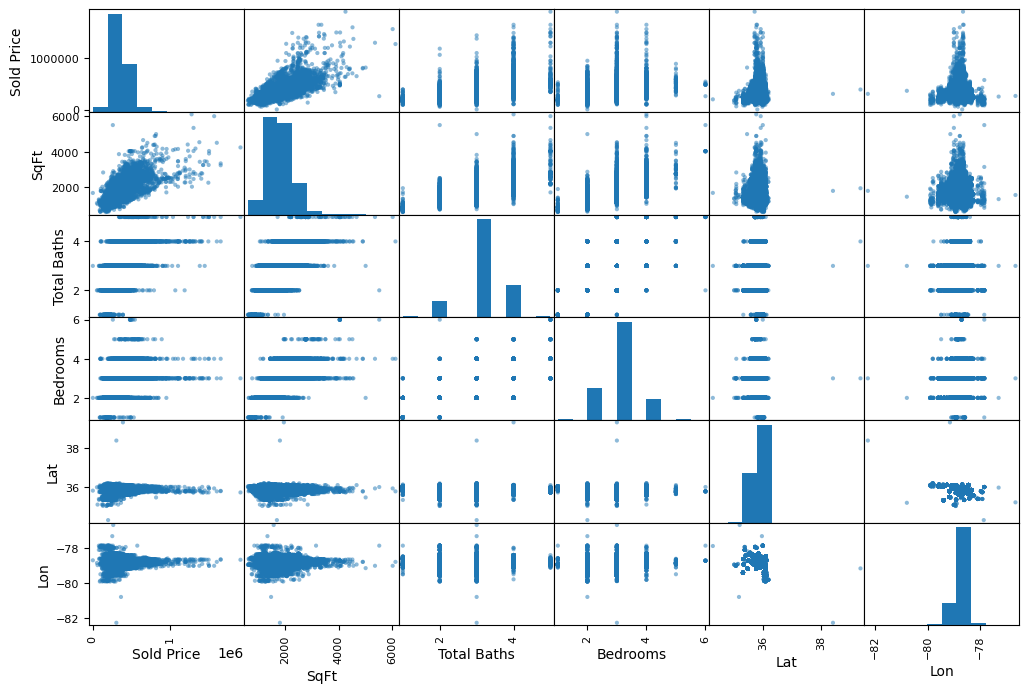

In [7]:
#Visualize the scatter matrix
scatter_columns = ["Sold Price", "SqFt", "Total Baths", "Bedrooms", 'Lat', 'Lon']
scatter_matrix(th_nostr_df[scatter_columns], figsize=(12, 8))
#plt.savefig('matrix.png')

<Axes: xlabel='SqFt', ylabel='Sold Price'>

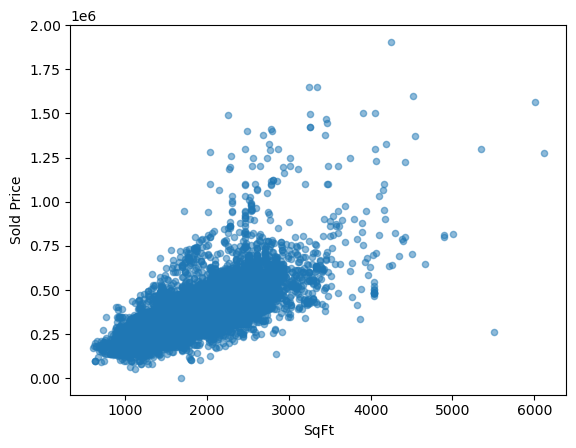

In [8]:
#Visualize the scatter plot for Total Living Area SqFt vs Sold Price
th_nostr_df.plot(kind="scatter", x="SqFt", y="Sold Price", alpha=0.5)
#plt.savefig('scatter.png')

In [9]:
#Create a new column for the price per square foot
th_nostr_df['Price per SqFt'] = th_nostr_df['Sold Price'] / th_nostr_df['SqFt']

#Create a correlation matrix to see what the correlation is for Price per SqFt
corr_matrix = th_nostr_df.corr()
corr_matrix["Sold Price"].sort_values(ascending=False)

Sold Price        1.000000
List Price        0.989008
SqFt              0.725548
Price per SqFt    0.579885
Total Baths       0.449704
Bedrooms          0.399934
Year Built        0.319331
Mortgage Rates    0.230253
Days on Market    0.152606
Over Asking       0.038966
Lat               0.020090
Acres            -0.039080
Zip              -0.043421
Lon              -0.105786
Cluster          -0.146301
Name: Sold Price, dtype: float64

In [10]:
#Check the orginal data frame to see how many cities are in the data
len(th_df['City'].value_counts())

40

In [11]:
th_df = th_df[th_df['City'].map(th_df['City'].value_counts()) > 9]
th_df['City'].value_counts()

City
Raleigh          6715
Durham           3924
Cary             2123
Apex             1702
Wake Forest       983
Clayton           866
Morrisville       569
Chapel Hill       522
Fuquay Varina     494
Garner            448
Mebane            286
Hillsborough      286
Holly Springs     285
Zebulon           202
Pittsboro         199
Knightdale        153
Wendell           150
Angier            120
Sanford           117
Burlington        109
Haw River          92
Graham             92
Carrboro           88
Rolesville         81
Carthage           81
Whitsett           67
Franklinton        62
Greensboro         42
Lillington         40
Wilson             38
Selma              36
Four Oaks          30
Dunn               27
Gibsonville        24
Goldsboro          24
Smithfield         24
Rocky Mount        22
Fayetteville       19
Creedmoor          14
New Hill           14
Name: count, dtype: int64

In [12]:
th_df = th_df[th_df["Days on Market"]< 3000]
th_df.describe()

,Mortgage Rates,Zip,Bedrooms,Total Baths,SqFt,Acres,Year Built,List Price,Sold Price,Days on Market,Over Asking,Lat,Lon,Cluster,Price per SqFt
count,21170.000000,21170.000000,21170.000000,21170.000000,21170.000000,21170.000000,21170.000000,2.117000e+04,2.117000e+04,21170.000000,21170.000000,21170.000000,21170.000000,21170.000000,21170.000000
mean,5.167953,27580.721493,2.924138,3.105338,1798.321398,1.014832,2010.414265,3.552470e+05,3.597792e+05,94.037459,4532.138829,35.837608,-78.764410,1.866131,201.158032
std,1.739171,116.885026,0.611515,0.603543,462.756918,0.183053,13.526034,1.203503e+05,1.197214e+05,91.474410,17808.482233,0.141479,0.225046,1.289621,42.571844
min,2.650000,25727.000000,1.000000,1.000000,606.000000,1.000000,1936.000000,2.200000e+03,2.200000e+03,0.000000,-170000.000000,34.265100,-82.277400,0.000000,1.304864
25%,3.090000,27519.000000,3.000000,3.000000,1463.000000,1.000000,2004.000000,2.790000e+05,2.830000e+05,37.000000,-1700.000000,35.764500,-78.887000,1.000000,173.754516
50%,5.660000,27603.000000,3.000000,3.000000,1737.000000,1.000000,2016.000000,3.391700e+05,3.430000e+05,56.000000,0.000000,35.848000,-78.790800,1.000000,197.733757
75%,6.740000,27616.000000,3.000000,3.000000,2079.000000,1.000000,2021.000000,4.104225e+05,4.150000e+05,126.000000,10000.000000,35.918200,-78.600800,3.000000,223.546945
max,7.790000,28587.000000,6.000000,5.000000,6115.000000,8.000000,2024.000000,1.973000e+06,1.905000e+06,1242.000000,225100.000000,39.363100,-76.660400,4.000000,658.859920


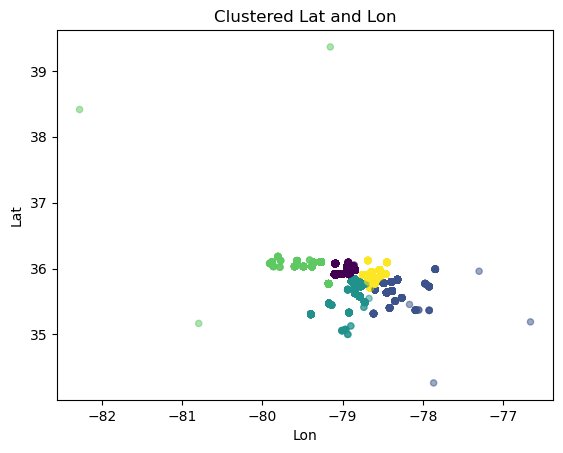

In [13]:
#Cluster the Lat and  Lon into groups
from sklearn.cluster import KMeans
th_df['Cluster'] = KMeans(n_clusters=5).fit_predict(th_df[['Lat', 'Lon']])
th_df.plot(kind="scatter", x="Lon", y="Lat", c="Cluster", cmap='viridis', colorbar=False, alpha=0.5)
plt.title('Clustered Lat and Lon')
plt.savefig('clustered.png')


In [14]:
#Create a variable for the top 10 cities with the highest average sold price
top10 = th_df.groupby('City')['Sold Price'].mean().nlargest(373).reset_index()

#Plot the top 10 cities with the highest average sold price
fig = px.bar(top10, x='City', y='Sold Price',color='City', template='plotly',
             title='Cities with Highest Avg. Sold Price') 
fig.update_traces(textposition='outside')
fig.show()

In [15]:
top10 = th_df.groupby('City')['Total Baths'].mean().nlargest(10).reset_index()

fig = px.bar(top10, x='City', y='Total Baths',color='Total Baths', template='plotly', 
             title='Top 10 Cities with the Most Avg Total Baths')
fig.update_traces(texttemplate='%{y:.}', textposition='outside')
fig.show()

In [16]:
df_mean = th_df.groupby('Over Asking')['SqFt'].mean().reset_index()

fig = px.scatter(df_mean, x='Over Asking', y='SqFt', trendline='ols', 
                 labels={'Over Asking':'Over Asking', 'SqFt':'Mean House Size'})
fig.update_layout(title='Distribution of Mean House Size by Over Asking')
fig.show()

In [17]:
fig = px.scatter(th_df, x='SqFt', y='Over Asking', color='Bedrooms', size='Total Baths',trendline='ols')
fig.update_layout(title='House Size vs Over Asking',
                  xaxis_title='House Size',
                  yaxis_title='Over Asking')
fig.show()

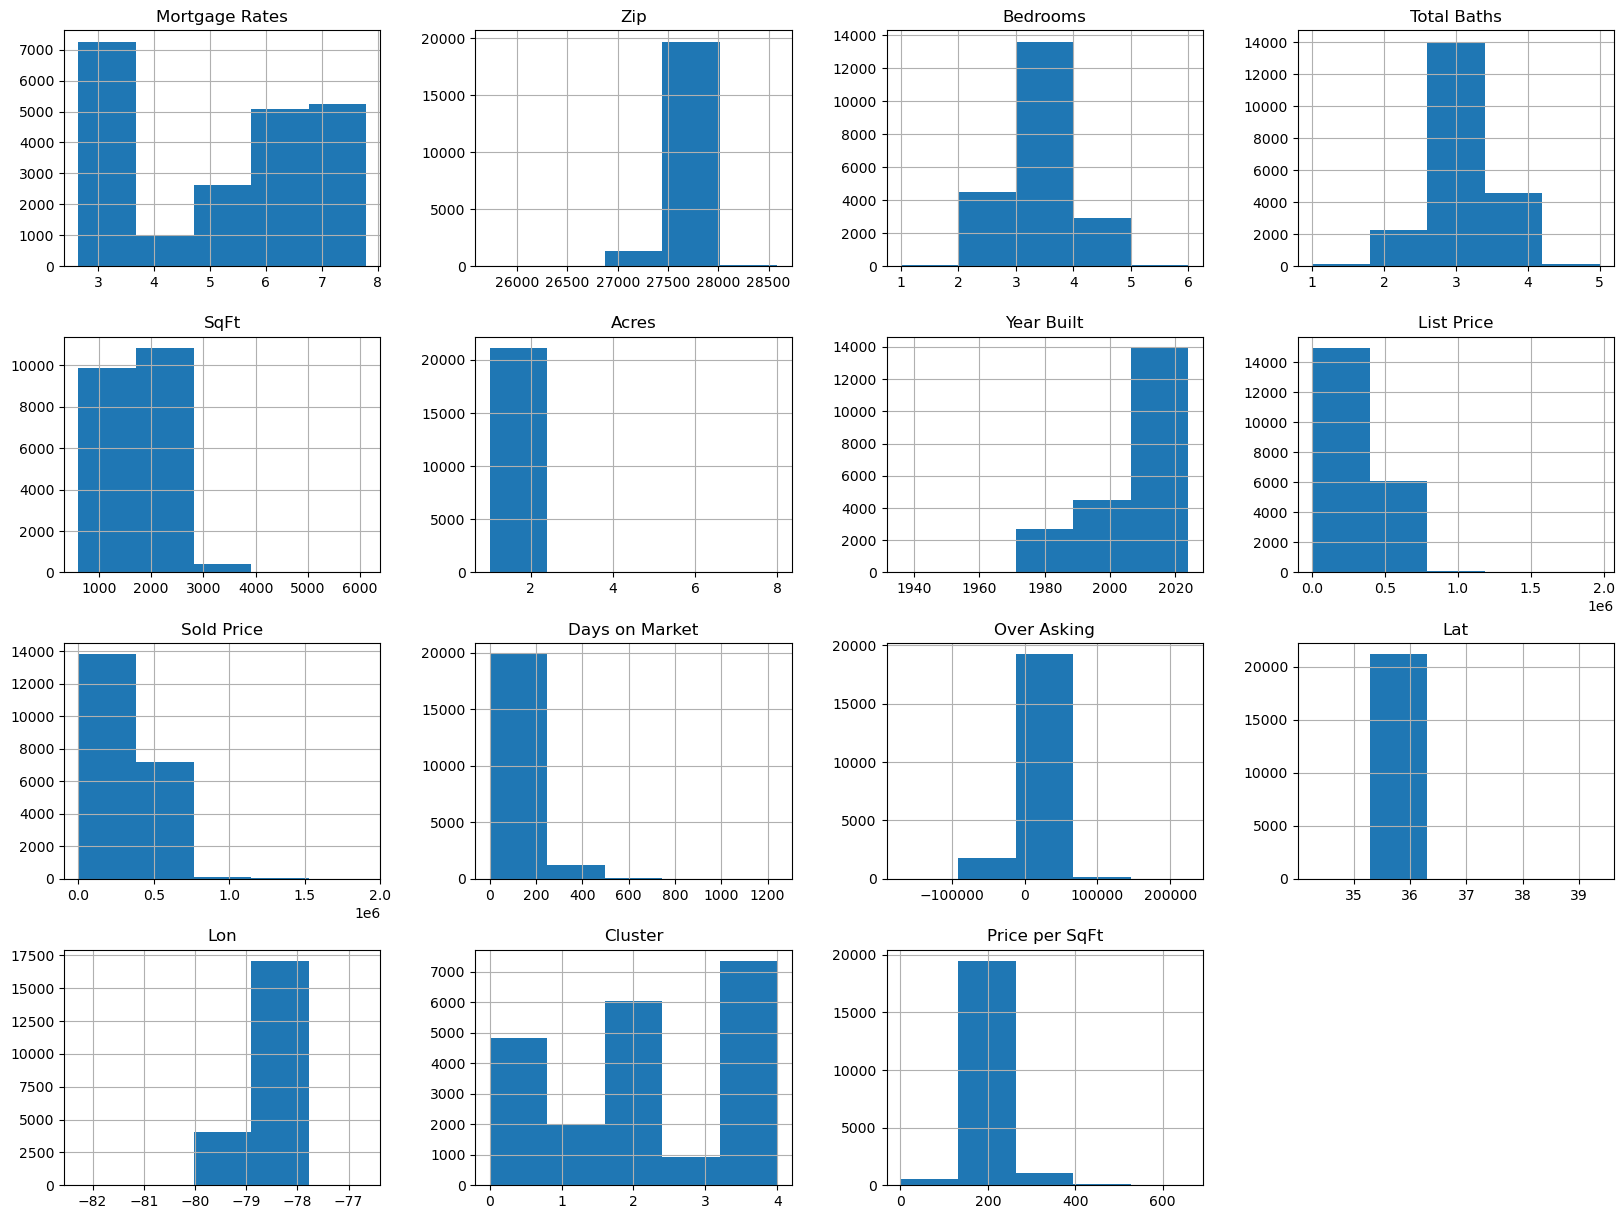

In [18]:
th_df.hist(bins=5, figsize=(20,15))
#plt.savefig("attribute_histogram_plots")
plt.show()

In [19]:
th_df.head()

,Mortgage Rates,MLS #,City,Zip,Bedrooms,Total Baths,SqFt,Acres,Year Built,List Date,Closing Date,List Price,Sold Price,Days on Market,Over Asking,Lat,Lon,Cluster,Price per SqFt
0,2.65,2326790,Durham,27707,3,4,2339,1,2020,2020-06-24,2021-01-08,301980,319129,198,17149,35.9631,-78.9315,0,136.438221
1,2.65,2356953,Wake Forest,27587,3,3,1570,1,2002,2020-12-08,2021-01-06,199000,215000,29,16000,35.9815,-78.5392,4,136.942675
2,2.65,2352181,Cary,27511,3,3,1464,1,1992,2020-11-05,2021-01-05,249900,264774,61,14874,35.7641,-78.7786,2,180.856557
3,2.65,2323642,Raleigh,27603,3,4,1732,1,2020,2020-06-07,2021-01-08,283645,296550,215,12905,35.7076,-78.6563,4,171.218245
4,2.65,2352460,Durham,27713,3,4,2337,1,1985,2020-11-06,2021-01-08,229900,242500,63,12600,35.9112,-78.9178,0,103.765511


In [20]:
# Variable with the Longitude and Latitude
X=th_df.loc[:,['MLS #','Lat','Lon']]
X.head(10)

,MLS #,Lat,Lon
0,2326790,35.9631,-78.9315
1,2356953,35.9815,-78.5392
2,2352181,35.7641,-78.7786
3,2323642,35.7076,-78.6563
4,2352460,35.9112,-78.9178
5,2355972,35.7667,-78.6008
6,2355149,35.8072,-78.8870
7,2354789,35.9112,-78.9178
8,2355253,35.9112,-78.9178
9,2355548,36.0756,-79.0914


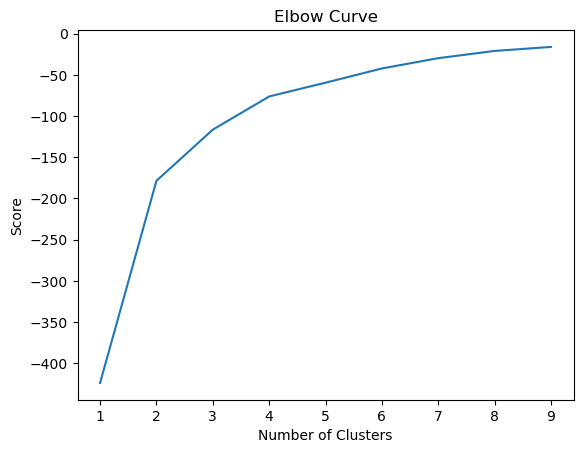

In [21]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = th_df[['Lat']]
X_axis = th_df[['Lon']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [22]:
kmeans = KMeans(n_clusters = 4, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
X.head(10)

,MLS #,Lat,Lon,cluster_label
0,2326790,35.9631,-78.9315,3
1,2356953,35.9815,-78.5392,0
2,2352181,35.7641,-78.7786,1
3,2323642,35.7076,-78.6563,0
4,2352460,35.9112,-78.9178,3
5,2355972,35.7667,-78.6008,0
6,2355149,35.8072,-78.8870,1
7,2354789,35.9112,-78.9178,3
8,2355253,35.9112,-78.9178,3
9,2355548,36.0756,-79.0914,2


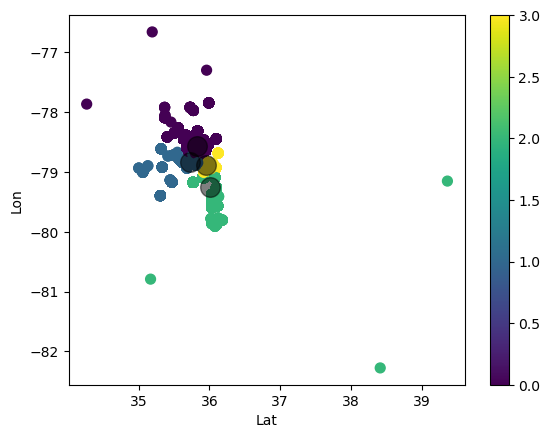

In [23]:
X.plot.scatter(x = 'Lat', y = 'Lon', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

<Axes: xlabel='SqFt'>

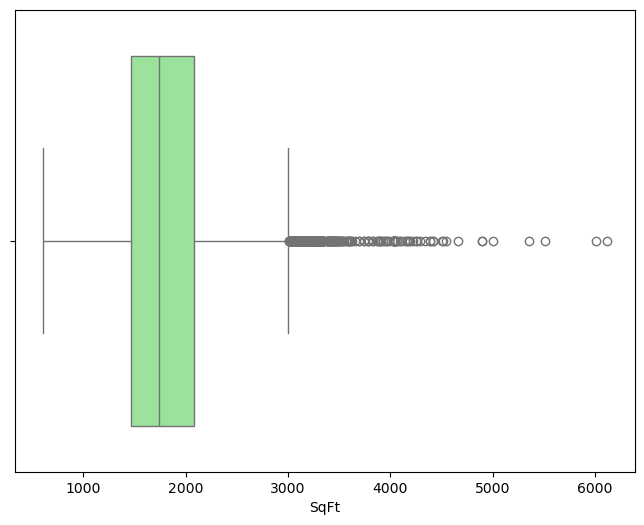

In [24]:
#Visualize the distribution of each numerical feature using box plots. Points beyond the “whiskers” of the box plot can be considered potential outliers.  
plt.figure(figsize=(8, 6)) 
sns.boxplot(x=th_df['SqFt'], color='lightgreen')

<Axes: xlabel='Bedrooms'>

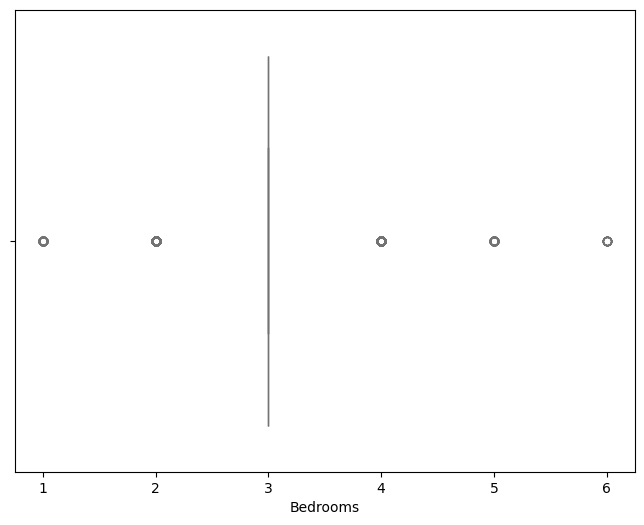

In [25]:
plt.figure(figsize=(8, 6)) 
sns.boxplot(x=th_df['Bedrooms'], color='lightgreen')

<Axes: xlabel='Total Baths'>

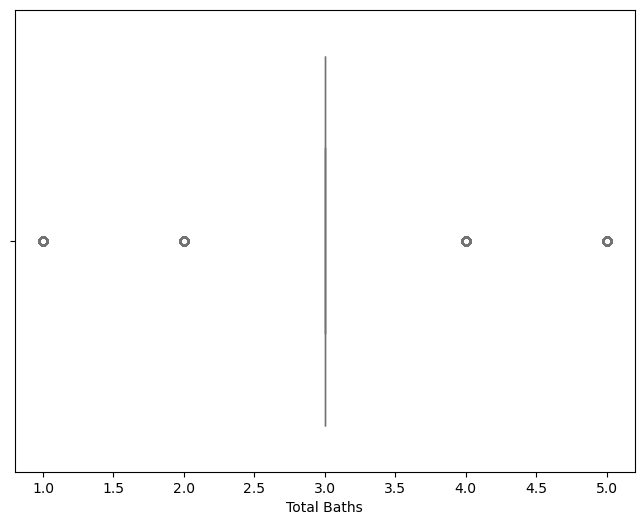

In [26]:
plt.figure(figsize=(8, 6)) 
sns.boxplot(x=th_df['Total Baths'], color='lightgreen')

<Axes: xlabel='Acres'>

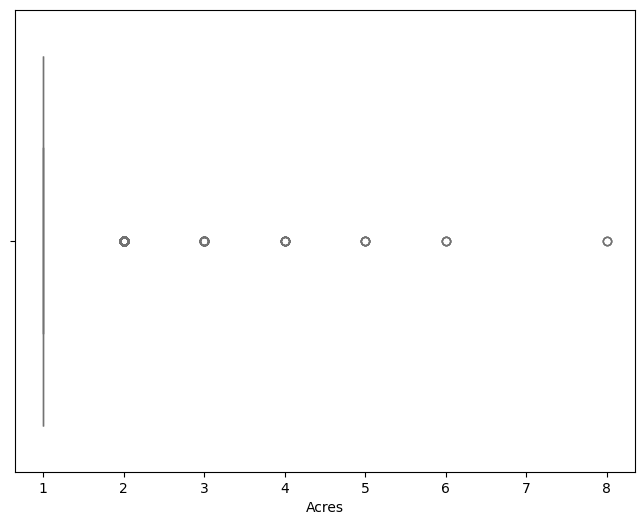

In [27]:
plt.figure(figsize=(8, 6)) 
sns.boxplot(x=th_df['Acres'], color='lightgreen')

<Axes: xlabel='Days on Market'>

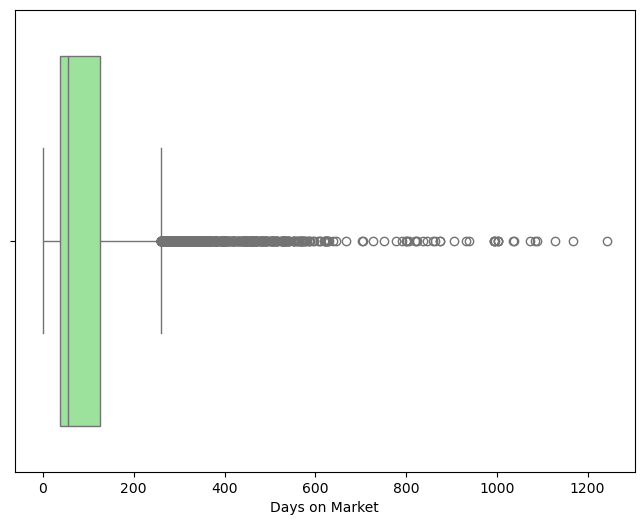

In [28]:
plt.figure(figsize=(8, 6)) 
sns.boxplot(x=th_df['Days on Market'], color='lightgreen')

<Axes: xlabel='Year Built'>

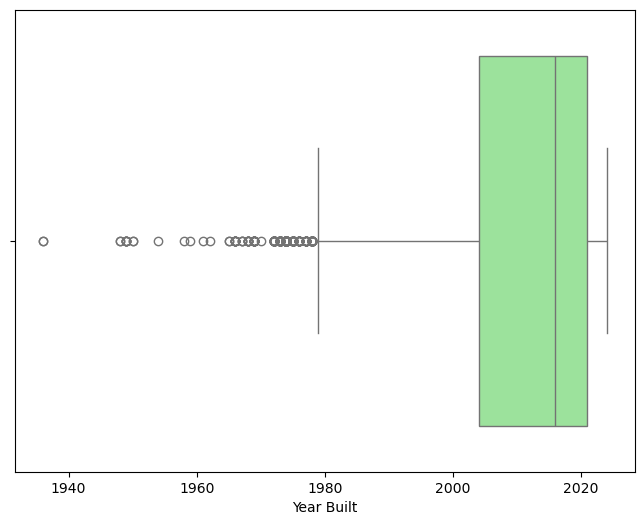

In [29]:
plt.figure(figsize=(8, 6)) 
sns.boxplot(x=th_df['Year Built'], color='lightgreen')

In [30]:
#Calculate the Z-score for each data point, and points with a Z-score beyond a certain threshold can be considered outliers.
from scipy.stats import zscore

z_scores = zscore(th_nostr_df)
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3).all(axis=1)

outliers

0        False
1        False
2        False
3        False
4        False
         ...  
21165    False
21166    False
21167    False
21168    False
21169    False
Length: 21170, dtype: bool

In [31]:
Q1 = th_nostr_df.quantile(0.25)
Q3 = th_nostr_df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((th_nostr_df < (Q1 - 1.5 * IQR)) | (th_nostr_df > (Q3 + 1.5 * IQR))).any(axis=1)

outliers

0         True
1        False
2        False
3         True
4         True
         ...  
21165     True
21166    False
21167     True
21168     True
21169     True
Length: 21170, dtype: bool

<Axes: xlabel='Sold Price', ylabel='Count'>

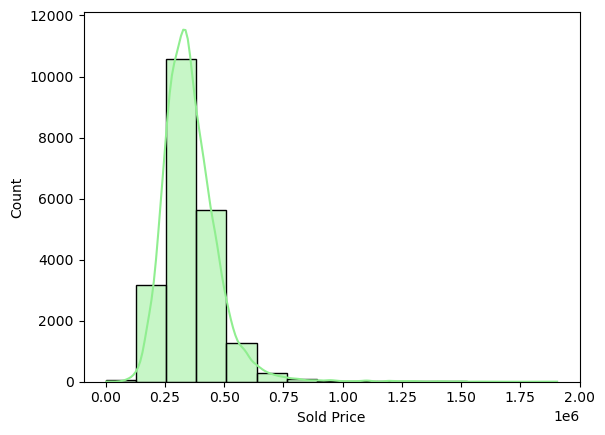

In [32]:
sns.histplot(th_df['Sold Price'], bins=15, kde=True, color='lightgreen')


([<matplotlib.patches.Wedge at 0x7fd62aa90b80>,
 [Text(-0.9901635030128498, -0.4791411454898465, '3'),
  Text(1.099999806144492, -0.0006530559548974853, '2'),
  Text(0.5009162395217462, 0.9793277903661228, '4'),
  Text(0.03525353392416882, 1.099434940478907, '1'),
  Text(0.013385327719987777, 1.0999185574404264, '5'),
  Text(0.0017957480962365925, 1.0999985342211938, '6')],
 [Text(-0.5400891834615544, -0.26134971572173443, '64.3%'),
  Text(0.5999998942606319, -0.00035621233903499193, '21.3%'),
  Text(0.2732270397391343, 0.5341787947451578, '13.7%'),
  Text(0.0192292003222739, 0.5996917857157673, '0.3%'),
  Text(0.007301087847266059, 0.5999555767856871, '0.3%'),
  Text(0.0009794989615835958, 0.5999992004842875, '0.1%')])

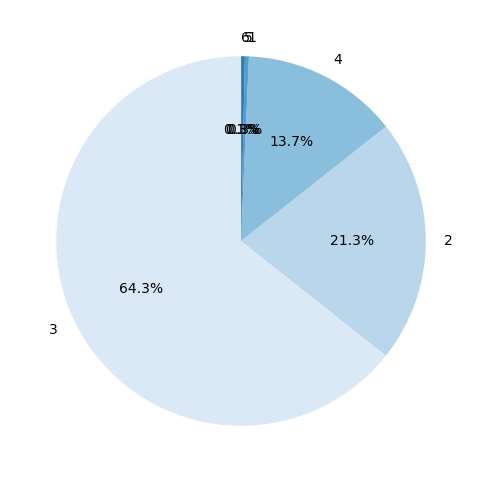

In [33]:
bedroom_counts = th_df['Bedrooms'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(bedroom_counts, labels=bedroom_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Blues'))


([<matplotlib.patches.Wedge at 0x7fd62aafd180>,
 [Text(-0.9578352310812841, -0.5408804582340383, '3'),
  Text(1.0900290558814396, 0.14777231585861325, '4'),
  Text(0.4486525275202147, 1.0043460108696223, '2'),
  Text(0.06509381786920265, 1.098072308582277, '1'),
  Text(0.020240231862597793, 1.099813771969668, '5')],
 [Text(-0.5224555805897912, -0.29502570449129356, '66.4%'),
  Text(0.5945613032080579, 0.0806030813774254, '21.6%'),
  Text(0.24471956046557158, 0.5478250968379756, '10.8%'),
  Text(0.0355057188377469, 0.5989485319539691, '0.7%'),
  Text(0.011040126470507887, 0.5998984210743642, '0.6%')])

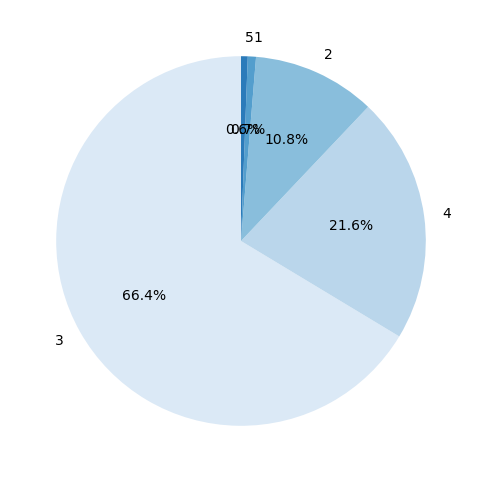

In [34]:
bathroom_counts = th_df['Total Baths'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(bathroom_counts, labels=bathroom_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Blues'))


In [35]:
# Compute correlation matrix
corr_matrix = th_nostr_df.corr()

<Axes: >

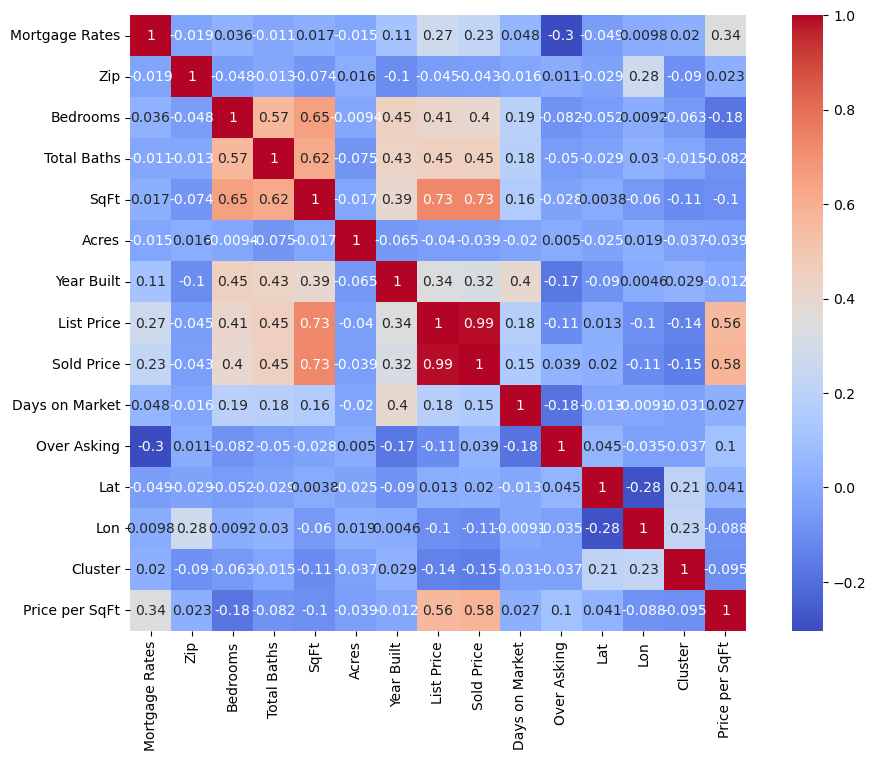

In [36]:
# Generate heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)

In [37]:
# Save the DataFrame to a CSV file
th_df.to_csv('Clean_Data/mls_th_cleaned.csv', index=False)